

```
# Timeline & Action Plan
```
- Day 1:
  - Data cleaning
  - Basic Visualization
- Day 2 -- Model & 3 Case Studies
- Day 3 -- Final Touches, Presentation Building
- Day 4 -- Present!



# Project Goal

The goal of our project is to better understand the  qualities that produce a well-performing solar farm. This will be done by using data on existing solar farms to generate performance predictions on three locations. The locations are:

- Virginia
- Arkansas
- North Carolina

Using this data, we hope to propose three potential solar facility projects that are realistic and maximize energy capacity. We will share predicted maximum capacity values for each site and the most important features used in our model.

# Summary

Solar power development in the United States is growing due to emerging technologies, decreasing costs, and nationwide efforts to convert the grid to renewable energy. Currently, solar power provides around 3.5% of electricity in the United States.

The United States Large-Scale Solar Photovoltaic Database (UPSVDB) is a geospatial dataset that provides information on the locations and capacities of solar facilities across the country. Data is sourced from Environmental Information Administration (EIA) facility location data and the National Renewable Energy Laboratory (NREL), and locations are verified using high-resolution aerial imagery. Confidence level is included in the dataset.

Not all locations are suitable for solar facilities. High solar irradiance is an important variable to consider when developing new sites. Additionally, flat, cleared land is vital to allow for large-scale implementation of solar energy production. Solar projects should not be developed near wetlands and other bodies of water.

Charlottesville, Virginia is a suitable location for solar facilities. There is ample sunshine and incentive to develop renewable energy programs as a result of the Virginia Clean Economy Act. Potential concerns include Charlottesville’s mountainous terrain and availability of usable land.

North Dakota is the most unsuitable location for solar energy production. The state only sees half the number of sunny days as California, the most important location in the country for solar energy projects. Average solar irradiance is low. While the state has invested around $3 million on solar project research, 0% of its total electricity is derived from solar. Tax incentives in the oil and gas industry further undermine potential solar projects. However, developing facilities in certain locations of the state are possible and could potentially represent an untapped market.

# Important Variables
- case_id: Unique farm identification number
- p_state: State the farm is in
- p_county: County the farm is in
- p_tech_sec: panel type
    - c-si
    - thin-film
    - cpv
    - multi: more than one type of panel
    - unknown
- p_area: size of the farm
- p_azimuth: East-West orientation in degrees
- p_tilt: tilt angle of panels in degrees
- p_cap_ac: facility capacity in megawatts AC (Alternating Current)
- p_cap_dc: facility capacity in megawatts DC (Direct Current)
- p_site:
  - greenfield: Does not fall into one of the below
  - contaminated: previously a site declared hazardous by the EDA, now inactive or abandoned
  - landfill: designated as a landfill by the EDA
- agrivoltaic: Agrivoltaic facilities make use of the land between panel rows and surrounding arrays for agricultural uses (i.e., crop production or grazing) and/or ecosystem services (e.g., pollinator habitat).
- nonAgrivoltaic: solar facilities that do not have any agricultural production.
- p_zscore: The z-score of the ratio of facility capacity (in DC) and facility area (p_cap_dc/p_area).

# Solar in Arkansas
- National Ranking: 33rd (Up from 37th in 2022)
- Percentage of State Electricity from Solar: 1.74%
- Prices down 42% in last 10 years
- Ranked 13th in solar growth over next 5 years
https://www.seia.org/state-solar-policy/arkansas-solar


- Ranked 24th in total sunlight hours: 4.69
 https://www.turbinegenerator.org/sunlight-hours-rank/

- Average Solar Panel Cost: $2.60, $13,000
- No state-level tax incentives for installing a solar system
- Allows for Net Metering, where you can connect solar panels to a public-utility power gris to offset cost.
https://www.forbes.com/home-improvement/solar/arkansas-solar-incentives/

# Solar in North Carolina
- National Ranking: 4th (Up from 16th in 2022)
- Percentage of State Electricity from Solar: 8.98%
- Ranked 23rd in solar growth over next 5 years
https://www.seia.org/state-solar-policy/north-carolina-solar

- Ranked 12th in total sunlight hours: 5.06
 https://www.turbinegenerator.org/sunlight-hours-rank/


- Individual, non-profit solar panel uses are not taxable.
- Solar panels installed on company premises are considered business property and taxable
- Agricultural producers can receive fuaranteed loan financing and grant funding from the Department of Agriculture. Loan covers installation and improvement up to 75% if titak eligible project costs.
- Duke Energy Solar Rebate Program:
  - Residential customers: Expect to get $0.40 per watt. An average 8-kilowatt (kW) system can be eligible for a rebate of $3,200.
Commercial customers: Expect to receive $0.30 per watt, up to a rebate of $30,000.
Nonprofit customers: Up to $0.75 per watt is possible, or a rebate of up to $75,000.
- Net Metering
- Average Solar Panel Cost: $2.54, $14,650 -- NOT inlcuding state/federal tax credits and incentives
https://www.forbes.com/home-improvement/solar/north-carolina-solar-incentives/


#Solar in Virginia
- National Ranking: 9th (no change from 2022)
- Percentage of State Electricity from Solar: 6.15%
- Ranked 10th in solar growth over next 5 years
- Ranked 40th in total sunlight hours: 4.13
- Colonial Trail West in Spring Grove is the largest solar facility in the state
- UPSVDB dataset includes fifty-one solar facilities
- Facilities are distributed across 29,512 acres of the state (with reduced coverage in the state’s mountainous southwestern region)
- Facility average of 39.5 MW capacity
- Allows for Net Metering

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving efficiency.csv to efficiency.csv


In [ ]:
# Specify the file name you uploaded
solar_data = "efficiency.csv"

# Read the CSV file into a Pandas DataFrame
solar_data = pd.read_csv(solar_data)

# Display the DataFrame
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  3699 non-null   int64  
 1   Unnamed: 0    3699 non-null   int64  
 2   p_state       3699 non-null   object 
 3   p_county      3699 non-null   object 
 4   ylat          3699 non-null   float64
 5   xlong         3699 non-null   float64
 6   p_area        3699 non-null   int64  
 7   p_tech_sec    3699 non-null   object 
 8   p_axis        3436 non-null   object 
 9   p_azimuth     3699 non-null   int64  
 10  p_tilt        3265 non-null   float64
 11  p_cap_ac      3699 non-null   float64
 12  p_cap_dc      3699 non-null   float64
 13  p_type        3699 non-null   object 
 14  p_agrivolt    3699 non-null   object 
 15  p_zscore      3699 non-null   float64
 16  efficiency    3699 non-null   float64
dtypes: float64(7), int64(4), object(6)
memory usage: 491.4+ KB


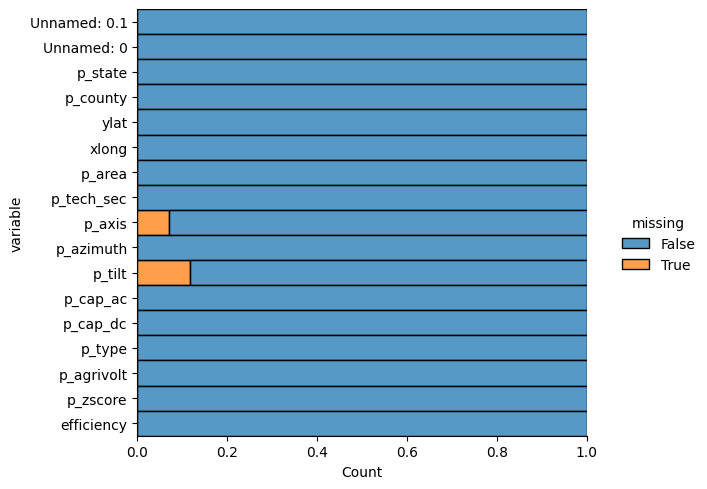

In [ ]:
import seaborn as sns
sns.displot(
    data=solar_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

In [ ]:
solar_data['p_axis'] = solar_data['p_axis'].replace({
    'fixed-tilt,single-axis': 'combination',
    'fixed-tilt,single-axis,dual-axis': 'combination'
})
solar_data['p_axis'].value_counts()

fixed-tilt     1975
single-axis    1430
dual-axis        25
combination       6
Name: p_axis, dtype: int64

In [ ]:
solar_data['p_type'] = solar_data['p_type'].replace({'landfill': 'landfill', 'landfill named': 'landfill',
                                                     'greenfield': 'greenfield',
                                                     'PCSC': 'contaminated', 'superfund': 'contaminated',
                                                     'RCRA': 'contaminated', 'AML': 'contaminated'})
(solar_data['p_type'].value_counts())

greenfield      3522
landfill         115
contaminated      62
Name: p_type, dtype: int64

In [ ]:
solar_data['p_tech_sec'].value_counts()
solar_data['p_tech_sec'] = solar_data['p_tech_sec'].replace({
    'c-si': 'c-si',
    'thin film': 'thin-film',
    'unknown': 'unknown',
    'cpv': 'cpv',
    'c-si,thin-film': 'combination',
    'c-si,cpv': 'combination',
    'c-si,thin-film,cpv': 'combination'
})
# Verify the changes
print(solar_data['p_tech_sec'].value_counts())

c-si           2962
thin-film       396
unknown         333
combination       4
cpv               4
Name: p_tech_sec, dtype: int64


In [ ]:
solar_data['p_agrivolt'] = (solar_data['p_agrivolt'].apply(lambda x: x if x == 'non-agrivoltaic' else 'agrivoltaic'))
solar_data['p_agrivolt'].value_counts()

non-agrivoltaic    3633
agrivoltaic          66
Name: p_agrivolt, dtype: int64

In [ ]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  3699 non-null   int64  
 1   Unnamed: 0    3699 non-null   int64  
 2   p_state       3699 non-null   object 
 3   p_county      3699 non-null   object 
 4   ylat          3699 non-null   float64
 5   xlong         3699 non-null   float64
 6   p_area        3699 non-null   int64  
 7   p_tech_sec    3699 non-null   object 
 8   p_axis        3436 non-null   object 
 9   p_azimuth     3699 non-null   int64  
 10  p_tilt        3265 non-null   float64
 11  p_cap_ac      3699 non-null   float64
 12  p_cap_dc      3699 non-null   float64
 13  p_type        3699 non-null   object 
 14  p_agrivolt    3699 non-null   object 
 15  p_zscore      3699 non-null   float64
 16  efficiency    3699 non-null   float64
dtypes: float64(7), int64(4), object(6)
memory usage: 491.4+ KB


In [ ]:
drop = [0, 1, 2, 3, 16]
solar_data = solar_data.drop(solar_data.columns[drop], axis=1)
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ylat        3699 non-null   float64
 1   xlong       3699 non-null   float64
 2   p_area      3699 non-null   int64  
 3   p_tech_sec  3699 non-null   object 
 4   p_axis      3436 non-null   object 
 5   p_azimuth   3699 non-null   int64  
 6   p_tilt      3265 non-null   float64
 7   p_cap_ac    3699 non-null   float64
 8   p_cap_dc    3699 non-null   float64
 9   p_type      3699 non-null   object 
 10  p_agrivolt  3699 non-null   object 
 11  p_zscore    3699 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 346.9+ KB


In [ ]:
solar_data.to_csv('clean_solar_data.csv')

In [ ]:
solar_zscore_n = MinMaxScaler().fit_transform(solar_data[['p_zscore']])

In [ ]:
abc = list(solar_data.select_dtypes('number')) #select function to find the numeric variables and create a list

solar_data[abc] = MinMaxScaler().fit_transform(solar_data[abc])
solar_data

,ylat,xlong,p_area,p_tech_sec,p_axis,p_azimuth,p_tilt,p_cap_ac,p_cap_dc,p_type,p_agrivolt,p_zscore
0,0.903626,0.726789,0.005977,c-si,single-axis,0.688889,NaN,0.008026,0.008120,greenfield,non-agrivoltaic,0.067259
1,0.877228,0.735786,0.006027,c-si,fixed-tilt,0.688889,0.000000,0.008026,0.007455,greenfield,non-agrivoltaic,0.061866
2,0.876678,0.735785,0.006055,c-si,fixed-tilt,0.688889,0.000000,0.008026,0.007455,greenfield,non-agrivoltaic,0.061573
3,0.911042,0.732474,0.008034,c-si,fixed-tilt,0.688889,NaN,0.010792,0.010517,greenfield,non-agrivoltaic,0.063110
4,0.861470,0.748790,0.005779,c-si,fixed-tilt,0.688889,0.361446,0.007684,0.008120,greenfield,non-agrivoltaic,0.069553
...,...,...,...,...,...,...,...,...,...,...,...,...
3694,0.410858,0.861173,0.037702,c-si,fixed-tilt,0.755556,0.000000,0.050717,0.056709,greenfield,non-agrivoltaic,0.067212
3695,0.020410,0.018442,0.006704,c-si,single-axis,0.688889,NaN,0.008026,0.006789,greenfield,non-agrivoltaic,0.051250
3696,0.376947,0.633583,0.449213,unknown,NaN,0.688889,0.240964,0.426400,0.434105,greenfield,non-agrivoltaic,0.042129
3697,0.703680,0.606879,0.002512,c-si,single-axis,0.688889,0.240964,0.002732,0.001464,greenfield,non-agrivoltaic,0.044335


In [ ]:
solar_data.dropna()

,ylat,xlong,p_area,p_tech_sec,p_axis,p_azimuth,p_tilt,p_cap_ac,p_cap_dc,p_type,p_agrivolt,p_zscore
1,0.877228,0.735786,0.006027,c-si,fixed-tilt,0.688889,0.000000,0.008026,0.007455,greenfield,non-agrivoltaic,0.061866
2,0.876678,0.735785,0.006055,c-si,fixed-tilt,0.688889,0.000000,0.008026,0.007455,greenfield,non-agrivoltaic,0.061573
4,0.861470,0.748790,0.005779,c-si,fixed-tilt,0.688889,0.361446,0.007684,0.008120,greenfield,non-agrivoltaic,0.069553
5,0.912392,0.723160,0.005766,c-si,fixed-tilt,0.688889,0.240964,0.008026,0.007854,greenfield,non-agrivoltaic,0.067695
6,0.897723,0.728365,0.006093,c-si,fixed-tilt,0.688889,0.361446,0.008026,0.008120,greenfield,non-agrivoltaic,0.065983
...,...,...,...,...,...,...,...,...,...,...,...,...
3691,0.513637,0.456536,0.043718,c-si,single-axis,0.688889,0.240964,0.033555,0.030618,greenfield,non-agrivoltaic,0.031312
3692,0.438854,0.486170,0.376429,thin-film,single-axis,0.688889,0.240964,0.261612,0.264510,greenfield,non-agrivoltaic,0.030404
3693,0.522052,0.456150,0.363892,thin-film,single-axis,0.688889,0.240964,0.189378,0.178514,greenfield,non-agrivoltaic,0.020960
3694,0.410858,0.861173,0.037702,c-si,fixed-tilt,0.755556,0.000000,0.050717,0.056709,greenfield,non-agrivoltaic,0.067212


Next steps:
1. Convert remaining variables to categories as needed.
2. One-hot encode categorical variables
3. Figure out prevalence of target variable (z-score).
4. What model do we want to use? (Random Forest? Decision Tree? KNN?)
5. Model Building
6. Evaluation
7. Visualization using geo-spatial data

In [ ]:
clean_data = pd.read_csv('clean_solar_data.csv')
clean_data['efficiency'] = clean_data['p_cap_dc']/clean_data['p_area']
state_groups = clean_data.groupby('p_state').median()
state_groups['count'] = clean_data.groupby('p_state').size()
state_groups.head()
state_groups.to_csv('efficiency_median.csv')

<ipython-input-33-4169f70f8fa9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_groups = clean_data.groupby('p_state').median()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cleaned_solar_data['p_tech_sec'] = cleaned_solar_data['p_tech_sec'].astype('category')
cleaned_solar_data['p_axis'] = cleaned_solar_data['p_axis'].astype('category')
cleaned_solar_data['p_type'] = cleaned_solar_data['p_type'].astype('category')
cleaned_solar_data['p_agrivolt'] = cleaned_solar_data['p_agrivolt'].astype('category')

# Initial Model: K Nearest Neighbors